# Statistics for replication
## Alpha and Theta
## Experiment 1 and experiment 2

### Multiple comparison needs to be implemented

https://pingouin-stats.org/generated/pingouin.multicomp.html

pg.multicomp

In [1]:
import numpy as np
import os
import pandas as pd
import pingouin as pg

from colourfulbirds import exp1_functionsforanalysis as dp1
from colourfulbirds import exp2_functionsforanalysis as dp2

from colourfulbirds import exp1_functionsforplotting as dp1_plot
from colourfulbirds import exp2_functionsforplotting as dp2_plot


# Load dataframes

In [2]:
# Load in data from exp 1 and 2
pathname = '../saved_files/replicated_results/'
exp1_alpha = pd.read_csv(pathname + 'exp1_alpha_replicated.csv', index_col=0)
exp2_alpha = pd.read_csv(pathname + 'exp2_alpha_replicated.csv', index_col=0)
exp1_theta = pd.read_csv(pathname + 'exp1_theta_replicated.csv', index_col=0)
exp2_theta = pd.read_csv(pathname + 'exp2_theta_replicated.csv', index_col=0)

# only exp1_theta has some different column names
exp1_theta = exp1_theta.rename(columns={'size1': 'size_1', 'size3': 'size_3', 'size6': 'size_6'})

In [3]:
# Transform wide pd's into long pd's for analysis
exp1_alpha_long = dp1.create_df_alpha_long(exp1_alpha, 'power')
exp2_alpha_long = dp2.create_df_alpha_long(exp2_alpha, 'power')
exp1_theta_long = dp1.create_df_theta_long(exp1_theta, 'power')
exp2_theta_long = dp2.create_df_theta_long(exp2_theta, 'power')

# Alpha - exp1

In [4]:
print(pg.sphericity(exp1_alpha_long, dv='power', within='set_size', subject='sub_id', method='mauchly'))
print(pg.sphericity(exp1_alpha_long, dv='power', within='lateralization', subject='sub_id', method='mauchly'))
print(pg.sphericity(exp1_alpha_long, dv='power', within=['set_size', 'lateralization'], subject='sub_id', method='mauchly'))

SpherResults(spher=False, W=0.45924645493755023, chi2=19.454206853997942, dof=2, pval=5.964480962726532e-05)
(True, nan, nan, 1, 1.0)
SpherResults(spher=False, W=0.6782097689410623, chi2=9.707466129393175, dof=2, pval=0.007799208188794809)


In [5]:
pg.rm_anova(exp1_alpha_long, dv='power', within=['set_size', 'lateralization'], 
            subject='sub_id', correction=True, detailed=True, effsize='n2')

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,n2,eps
0,set_size,11.018317,2,52,5.509159,8.230808,0.000784,0.004009,0.187466,0.649033
1,lateralization,2.709234,1,26,2.709234,12.935913,0.001326,0.001326,0.046095,1.000000
2,set_size * lateralization,0.475973,2,52,0.237986,2.864206,0.066063,0.082284,0.008098,0.756550


In [6]:
pg.pairwise_ttests(exp1_alpha_long, dv='power', within=['set_size', 'lateralization'],
                   subject='sub_id', effsize='cohen') # , parametric=False <-- does Wilcoxon

,Contrast,set_size,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,set_size,-,size_1,size_3,True,True,2.116723,26.0,two-sided,0.044012,1.378,0.229040
1,set_size,-,size_1,size_6,True,True,3.349597,26.0,two-sided,0.002480,15.393,0.371940
2,set_size,-,size_3,size_6,True,True,3.149692,26.0,two-sided,0.004080,10.011,0.136327
3,lateralization,-,contra,ipsi,True,True,-3.596653,26.0,two-sided,0.001326,26.586,-0.152325
4,set_size * lateralization,size_1,contra,ipsi,True,True,-1.189305,26.0,two-sided,0.245068,0.385,-0.073020
5,set_size * lateralization,size_3,contra,ipsi,True,True,-3.643176,26.0,two-sided,0.001177,29.514,-0.178343
6,set_size * lateralization,size_6,contra,ipsi,True,True,-3.138032,26.0,two-sided,0.004199,9.766,-0.172536


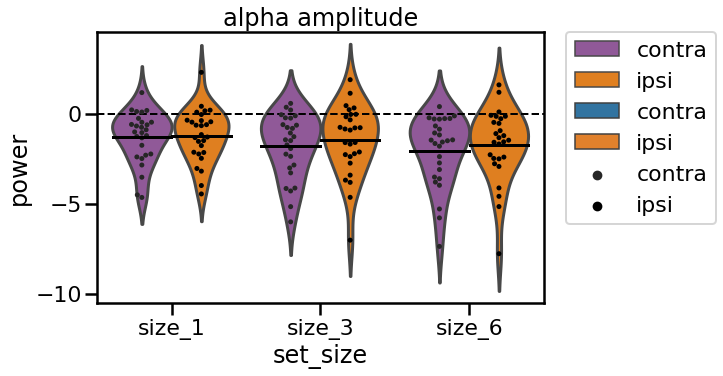

In [7]:
dp1_plot.plot_violin_swarms(exp1_alpha_long, parameter='power', frequency_band='alpha', save_fig=False)

# Theta - exp1

In [8]:
print(pg.sphericity(exp1_theta_long, dv='power', within='set_size', subject='sub_id', method='mauchly'))

SpherResults(spher=False, W=0.6551989408831258, chi2=10.57040907308324, dof=2, pval=0.005065995900903652)


In [9]:
pg.rm_anova(exp1_theta_long, dv='power', within=['set_size'], 
            subject='sub_id', correction=True, detailed=True, effsize='n2')

,Source,SS,DF,MS,F,p-unc,p-GG-corr,n2,eps,sphericity,W-spher,p-spher
0,set_size,0.023201,2,0.011600,0.168748,0.845183,0.780647,0.006448,0.743604,False,0.655199,0.005066
1,Error,3.574697,52,0.068744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
pg.pairwise_ttests(exp1_theta_long, dv='power', within=['set_size'],
                   subject='sub_id', effsize='cohen') # , parametric=False <-- does Wilcoxon

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,set_size,size_1,size_3,True,True,0.105139,26.0,two-sided,0.917072,0.205,0.012892
1,set_size,size_1,size_6,True,True,0.645469,26.0,two-sided,0.524279,0.247,0.075116
2,set_size,size_3,size_6,True,True,0.359547,26.0,two-sided,0.722090,0.216,0.058382


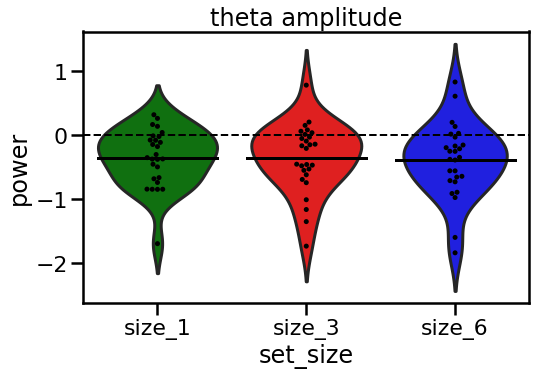

In [11]:
dp1_plot.plot_violin_swarms(exp1_theta_long, parameter='power', frequency_band='theta', save_fig=False)

# Alpha - exp2

In [12]:
print(pg.sphericity(exp2_alpha_long, dv='power', within='performance', subject='sub_id', method='mauchly'))
print(pg.sphericity(exp2_alpha_long, dv='power', within='lateralization', subject='sub_id', method='mauchly'))
print(pg.sphericity(exp2_alpha_long, dv='power', within=['performance', 'lateralization'], subject='sub_id', method='mauchly'))

(True, nan, nan, 1, 1.0)
(True, nan, nan, 1, 1.0)
(True, nan, nan, 1, 1.0)


In [13]:
pg.rm_anova(exp2_alpha_long, dv='power', within=['performance', 'lateralization'], 
            subject='sub_id', correction=True, detailed=True, effsize='n2')

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,n2,eps
0,performance,1.424388,1,36,1.424388,4.740858,0.036090,0.036090,0.072830,1.0
1,lateralization,1.953020,1,36,1.953020,18.566714,0.000121,0.000121,0.099859,1.0
2,performance * lateralization,0.118221,1,36,0.118221,2.916853,0.096270,0.096270,0.006045,1.0


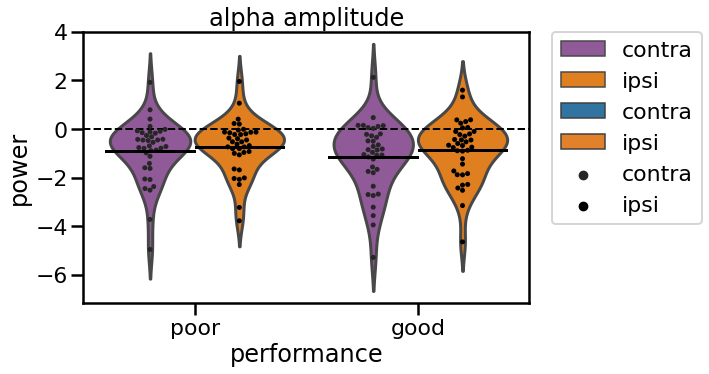

In [14]:
dp2_plot.plot_violin_swarms(exp2_alpha_long, parameter='power', frequency_band='alpha', save_fig=False)

# Theta - exp2

In [15]:
print(pg.normality(exp2_theta['poor']))
print(pg.normality(exp2_theta['good']))
print(pg.ttest(exp2_theta['poor'], exp2_theta['good'], paired=True))

             W      pval  normal
poor  0.908084  0.004983   False
             W      pval  normal
good  0.917707  0.009504   False
               T  dof alternative     p-val           CI95%   cohen-d   BF10  \
T-test -3.416965   36   two-sided  0.001586  [-0.26, -0.07]  0.417411  20.77   

           power  
T-test  0.695277  


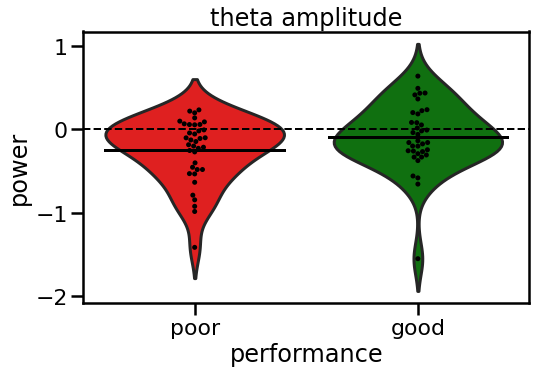

In [16]:
dp2_plot.plot_violin_swarms(exp2_theta_long, parameter='power', frequency_band='theta', save_fig=False)